In [11]:
# Reading the data

import os
import csv
import os.path
import pandas as pd
userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'silver.csv')
open(csvfile, "r")
data=pd.read_csv(csvfile, header=0)
data.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,12-Mar-18,16.57,16.62,16.625,16.445,0,-0.30
1,11-Mar-18,16.62,16.59,16.635,16.59,0,0.45
2,9-Mar-18,16.546,16.33,16.615,16.305,0.36K,0.67
3,8-Mar-18,16.436,16.44,16.465,16.375,0.07K,0.05
4,7-Mar-18,16.428,16.64,16.64,16.4,0.03K,-1.72


In [12]:
data.describe()

,Change %
count,992.000000
mean,0.015837
std,1.390666
min,-7.560000
25%,-0.650000
50%,0.030000
75%,0.692500
max,5.310000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 7 columns):
Date        992 non-null object
Price       993 non-null object
Open        993 non-null object
High        993 non-null object
Low         993 non-null object
Vol.        993 non-null object
Change %    992 non-null float64
dtypes: float64(1), object(6)
memory usage: 54.4+ KB


In [14]:
# Converting Price from object to float data type

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 7 columns):
Date        992 non-null object
Price       992 non-null float64
Open        993 non-null object
High        993 non-null object
Low         993 non-null object
Vol.        993 non-null object
Change %    992 non-null float64
dtypes: float64(2), object(5)
memory usage: 54.4+ KB


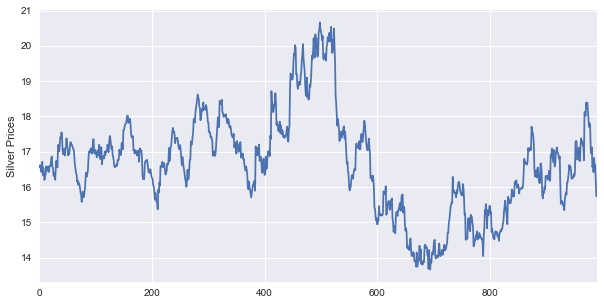

,S_3,S_9
9,16.421667,16.508889
10,16.375667,16.467778
11,16.305333,16.434889
12,16.290000,16.412667
13,16.418333,16.429222


In [15]:
from sklearn.linear_model import LinearRegression 

import pandas as pd 

import numpy as np 
 
import matplotlib.pyplot as plt 

import seaborn as sns
import datetime

data=data[['Price']] 

# Drop rows with missing values 

data= data.dropna() 

# Plot the price of GLD 

data.Price.plot(figsize=(10,5)) 
plt.ylabel("Silver Prices")
plt.show()
# Define explanatory variables - he explanatory variables in this strategy are the moving averages for past 
#3 days and 9 days

data['S_3'] = data['Price'].shift(1).rolling(window=3).mean() 
data['S_9']= data['Price'].shift(1).rolling(window=9).mean() 
data= data.dropna()
X = data[['S_3','S_9']] 
X.head()


In [16]:

y = data['Price']
y.head()

9     16.200
10    16.324
11    16.346
12    16.585
13    16.450
Name: Price, dtype: float64

In [17]:
# Splitting the data into train and test datasets
t=.8 
t = int(t*len(data)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [18]:
# fitting linear regression

linear = LinearRegression().fit(X_train,y_train) 

print ("Silver Price =", round(linear.coef_[0],2),  

"* 3 Days Moving Average", round(linear.coef_[1],2), 

"* 9 Days Moving Average +", round(linear.intercept_,2))

Silver Price = 1.27 * 3 Days Moving Average -0.29 * 9 Days Moving Average + 0.33


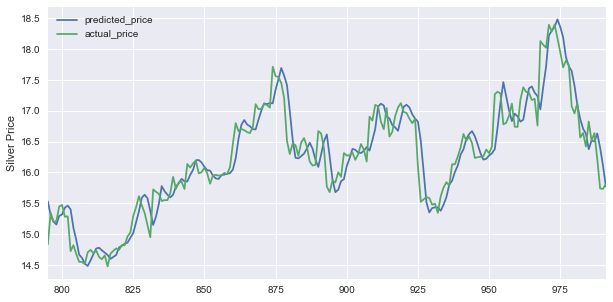

In [19]:
# predicting the prices and plotting the actual and predicted values

predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  

plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Silver Price")
plt.show()

In [20]:
# calculating R-Square

r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

87.97